<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%207-%20VGG19/VGG19_better.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.image import grayscale_to_rgb, resize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] and reshape for VGG input shape
x_train = (x_train.astype('float32') / 255.0).reshape(-1, 28, 28, 1)
x_test = (x_test.astype('float32') / 255.0).reshape(-1, 28, 28, 1)

# Convert class labels to one-hot encoding
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Load pre-trained VGG19 model with customized input shape
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the pre-trained VGG19 model
for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [5]:
# Extend VGG19 with new classification layers
model = Model(inputs=base_model.input, outputs=Dense(10, activation='softmax')(Dense(1024, activation='relu')(Flatten()(base_model.output))))


# Prepare data for VGG input dimensions
x_train_vgg = grayscale_to_rgb(resize(x_train, (48, 48), method='bicubic'))
x_test_vgg = grayscale_to_rgb(resize(x_test, (48, 48), method='bicubic'))

# Compile, train, and evaluate the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train_vgg, y_train, epochs=2, batch_size=50, validation_data=(x_test_vgg, y_test))


Epoch 1/2
1200/1200 [==============================] - 2024s 2s/step - loss: 0.2119 - accuracy: 0.9387 - val_loss: 0.1113 - val_accuracy: 0.9641
Epoch 2/2
1200/1200 [==============================] - 1997s 2s/step - loss: 0.1061 - accuracy: 0.9662 - val_loss: 0.1048 - val_accuracy: 0.9676


In [7]:
# Evaluate and print test accuracy
test_loss, test_accuracy = model.evaluate(x_test_vgg, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 305s 974ms/step - loss: 0.1048 - accuracy: 0.9676
Test accuracy: 0.9675999879837036


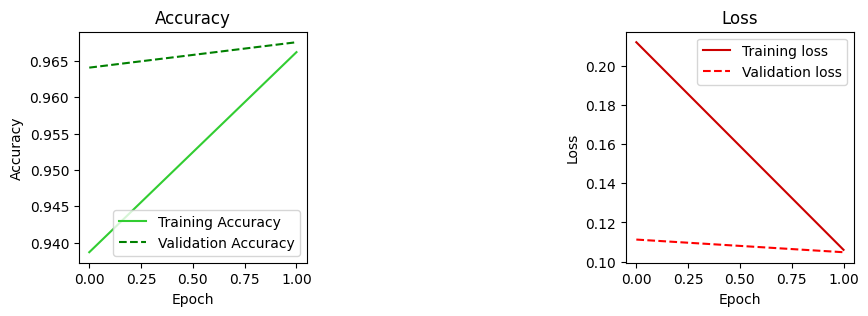

In [8]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='Training Accuracy',color='limegreen')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='green', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,3,3)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training loss', color='#cc0000',)
plt.plot(history.history['val_loss'], label='Validation loss',color = "#ff0000", linestyle = 'dashed')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 287ms/step


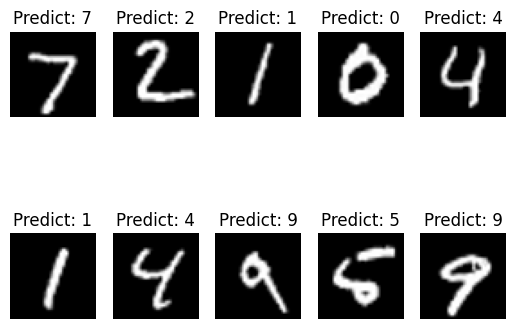

In [11]:
# Load some test images
test_images = x_test_vgg[:10]

# Make predictions on the test images
predictions = model.predict(test_images)

#Plot the test images and their predictions
for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predict: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
